# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [7]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# cargar archivos
df_plans = pd.read_csv('/datasets/plans.csv')
df_users = pd.read_csv('/datasets/users_latam.csv') #completa el código
df_usage = pd.read_csv('/datasets/usage.csv')  #completa el código

In [9]:
df_plans.head(5) # mostrar las primeras 5 filas de plans

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [10]:
df_users.head(5) # mostrar las primeras 5 filas de users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [11]:
df_usage.head(5) # mostrar las primeras 5 filas de usage

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [12]:
# revisar el número de filas y columnas de cada dataset
print("plans", df_plans.shape)
print("users", df_users.shape)
print("usage", df_usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [13]:
df_plans.info() # inspección de plans con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [14]:
df_users.info() # inspección de users con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [15]:
df_usage.info() # inspección de usage con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [16]:
# cantidad de nulos para users
print(df_users.isna().sum()) # Cantidad de valores nulos)
print(df_users.isna().mean()) # Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [17]:
# cantidad de nulos para usage
print(df_usage.isna().sum()) # Cantidad de valores nulos)
print(df_usage.isna().mean()) # Proporción de valores nulos)

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
- La columna city tiene un 11% de faltantes, las columnas churn_date, duration y lenght tienen más del 50% de los datos faltantes
- Indica qué harías: ¿imputar, eliminar, ignorar?
- Para las tres columnas se hará una imputación ya que para atender las preguntas de negocio necesitamos tener la informaicón de la duración de la llamada y de qué ciudades se hacen más uso del teléfono

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [18]:
df_users[["user_id", "age"]].describe() # explorar columnas numéricas de users

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` 
- La columna `age` tiene errores en las edades mostrando numeros negativos, el promedio de edad es 33 años pero la media indica 47 años así que datos disperos pueden estar alterando el promedio, la desviación es muy

In [19]:
df_usage[["id", "user_id"]].describe() # explorar columnas numéricas de usage

,id,user_id
count,40000.00000,40000.000000
mean,20000.50000,12002.405975
std,11547.14972,1157.279564
min,1.00000,10000.000000
25%,10000.75000,10996.000000
50%,20000.50000,12013.000000
75%,30000.25000,13005.000000
max,40000.00000,13999.000000


- Las columnas `id` y `user_id`presentan una desviasión muy similar, al igual el promedio con su media respectiva lo que nos indica que cada usuario tiene un id

In [20]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
df_users[columnas_user].nunique()

city    7
plan    2
dtype: int64

- La columna `city` tiene 7 diferentes valores únicos, 7 ciudades
- La columna `plan` tiene solo 2 planes en su servicio

In [21]:
# explorar columna categórica de usage
df_usage['type'].nunique() # completa el código

2

- La columna `type` solo muestra dos tipos de acciones, llamada o mensaje

---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels? - ¿Qué acción tomarías?
- En la colunma de edad encontré valores -999 y en city "?", como esas columnas son necesarias para realizar el análisis y responder las preguntas de negocio se hará una imputación de datos para city usando "otro" y para edad utilizando la mediana y tener datos estadisticos más reales
  

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [22]:
# Convertir a fecha la columna `reg_date` de users
df_users["reg_date"] = pd.to_datetime(df_users["reg_date"], errors="coerce", utc=True)
 # completa el código

In [23]:
# Convertir a fecha la columna `date` de usage
df_usage["date"] = pd.to_datetime(df_usage["date"], errors="coerce", utc=True) # completa el código

In [24]:
# Revisar los años presentes en `reg_date` de users
df_users["reg_date"].dt.year.unique()
df_users["reg_date"].dt.year.value_counts().sort_index()

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En `reg_date`, se ve que hay 4 años distintos y hay 40 registros con error en los datos del año 2026 un año futuro

In [25]:
# Revisar los años presentes en `date` de usage
df_usage["date"].dt.year.unique()

array([2024.,   nan])

In [26]:
df_usage["date"].isna().sum()

50

En `date`, hay registros del año 2024, hay registros faltantes ya que tenemos un total de 40000 y en registro hay 50 registros sin fecha o con algún error
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos) ¿Qué harías con ellas?
- Aparece un año sin transcurrir, para estos casos valdría revisar si son error de captura verificando si los usuarios están activos y cuando se registraron
- Los casos sin año posiblemente son error de captura siendo un sentinel

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [27]:
# Reemplazar -999 por la mediana de age
df_users["age"] = df_users["age"].replace(-999, pd.NA)
age_mediana=df_users["age"].median()
df_users["age"]=df_users["age"].fillna(age_mediana)
# Verificar cambios
df_users["age"].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [28]:
# Reemplazar ? por NA en city
df_users["city"] = df_users["city"].replace("?", pd.NA)
# Verificar cambios
df_users["city"].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [29]:
# Marcar fechas futuras como NA para reg_date
df_users.loc[df_users["reg_date"].dt.year == 2026, "reg_date"] = pd.NA
# Verificar cambios
df_users["reg_date"].dt.year.value_counts().sort_index()

2022.0    1314
2023.0    1316
2024.0    1330
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [30]:
# Verificación MAR en usage (Missing At Random) para duration
df_usage['duracion_vacia'] = df_usage['duration'].isna().astype(int)
df_usage.head(10)

,id,user_id,type,date,duration,length,duracion_vacia
0,1,10332,call,2024-01-01 00:00:00+00:00,0.09,NaN,0
1,2,11458,text,2024-01-01 00:06:30.969774244+00:00,NaN,39.0,1
2,3,11777,text,2024-01-01 00:13:01.939548488+00:00,NaN,36.0,1
3,4,10682,call,2024-01-01 00:19:32.909322733+00:00,1.53,NaN,0
4,5,12742,call,2024-01-01 00:26:03.879096977+00:00,4.84,NaN,0
5,6,10473,call,2024-01-01 00:32:34.848871221+00:00,4.68,NaN,0
6,7,12856,call,2024-01-01 00:39:05.818645466+00:00,3.27,NaN,0
7,8,13742,call,2024-01-01 00:45:36.788419710+00:00,4.81,NaN,0
8,9,11530,text,2024-01-01 00:52:07.758193954+00:00,NaN,44.0,1
9,10,12850,text,2024-01-01 00:58:38.727968199+00:00,NaN,70.0,1


In [31]:
# Verificación MAR en usage (Missing At Random) para length
df_usage['longitud_vacia'] = df_usage['length'].isna().astype(int)
df_usage.head(10)

,id,user_id,type,date,duration,length,duracion_vacia,longitud_vacia
0,1,10332,call,2024-01-01 00:00:00+00:00,0.09,NaN,0,1
1,2,11458,text,2024-01-01 00:06:30.969774244+00:00,NaN,39.0,1,0
2,3,11777,text,2024-01-01 00:13:01.939548488+00:00,NaN,36.0,1,0
3,4,10682,call,2024-01-01 00:19:32.909322733+00:00,1.53,NaN,0,1
4,5,12742,call,2024-01-01 00:26:03.879096977+00:00,4.84,NaN,0,1
5,6,10473,call,2024-01-01 00:32:34.848871221+00:00,4.68,NaN,0,1
6,7,12856,call,2024-01-01 00:39:05.818645466+00:00,3.27,NaN,0,1
7,8,13742,call,2024-01-01 00:45:36.788419710+00:00,4.81,NaN,0,1
8,9,11530,text,2024-01-01 00:52:07.758193954+00:00,NaN,44.0,1,0
9,10,12850,text,2024-01-01 00:58:38.727968199+00:00,NaN,70.0,1,0


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`
- Para duration, los faltantes dependen de la columna de type, si son texto no hay duración
- Para lenght, los faltantes dependen de la columna de type, si son llamada no hay longitud

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [32]:
# Columnas auxiliares
df_usage["is_text"] = (df_usage["type"] == "text").astype(int) #conocer el total de mensajes
df_usage["is_call"] = (df_usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
df_usage_agg = df_usage.groupby("user_id").agg(['mean', 'sum', 'count']).reset_index()

# observar resultado
df_usage_agg.head(3)

user_id            id               duration                  length         \
                   mean     sum count     mean    sum count       mean    sum   
0   10000  23677.800000  236778    10    7.900  23.70     3  36.857143  258.0   
1   10001  19763.866667  296458    15    3.318  33.18    10  45.200000  226.0   
2   10002  15920.571429  111444     7    5.370  10.74     2  45.000000  225.0   

         ... duracion_vacia longitud_vacia             is_text            \
  count  ...          count           mean sum count      mean sum count   
0     7  ...             10       0.300000   3    10  0.700000   7    10   
1     5  ...             15       0.666667  10    15  0.333333   5    15   
2     5  ...              7       0.285714   2     7  0.714286   5     7   

    is_call            
       mean sum count  
0  0.300000   3    10  
1  0.666667  10    15  
2  0.285714   2     7  

[3 rows x 22 columns]

In [33]:
# Renombrar columnas
df_usage_agg = df_usage_agg.rename(columns={"is_text":"cant_mensajes", "is_call":"cant_llamadas","duration":"cant_minutos_llamada"})
# observar resultado
df_usage_agg.head(3)

user_id            id               cant_minutos_llamada               \
                   mean     sum count                 mean    sum count   
0   10000  23677.800000  236778    10                7.900  23.70     3   
1   10001  19763.866667  296458    15                3.318  33.18    10   
2   10002  15920.571429  111444     7                5.370  10.74     2   

      length               ... duracion_vacia longitud_vacia            \
        mean    sum count  ...          count           mean sum count   
0  36.857143  258.0     7  ...             10       0.300000   3    10   
1  45.200000  226.0     5  ...             15       0.666667  10    15   
2  45.000000  225.0     5  ...              7       0.285714   2     7   

  cant_mensajes           cant_llamadas            
           mean sum count          mean sum count  
0      0.700000   7    10      0.300000   3    10  
1      0.333333   5    15      0.666667  10    15  
2      0.714286   5     7      0.285714   2     7  

[3 rows x 22 columns]

In [34]:
df_usage_agg.columns = ['_'.join(col).strip() for col in df_usage_agg.columns.values]
df_usage_agg = df_usage_agg.rename(columns={'user_id_': 'user_id'})
df_usage_agg = df_usage_agg.reset_index(drop=True)


In [35]:
# Combinar la tabla agregada con el dataset de usuarios
df_usage_agg = df_usage_agg.reset_index()
user_profile = pd.merge(df_users, df_usage_agg, on='user_id', how='left')

user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,index,id_mean,...,duracion_vacia_count,longitud_vacia_mean,longitud_vacia_sum,longitud_vacia_count,cant_mensajes_mean,cant_mensajes_sum,cant_mensajes_count,cant_llamadas_mean,cant_llamadas_sum,cant_llamadas_count
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00+00:00,Basico,NaN,0.0,23677.800000,...,10.0,0.300000,3.0,10.0,0.700000,7.0,10.0,0.300000,3.0,10.0
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619+00:00,Basico,NaN,1.0,19763.866667,...,15.0,0.666667,10.0,15.0,0.333333,5.0,15.0,0.666667,10.0,15.0
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239+00:00,Basico,NaN,2.0,15920.571429,...,7.0,0.285714,2.0,7.0,0.714286,5.0,7.0,0.285714,2.0,7.0
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858+00:00,Premium,NaN,3.0,20691.857143,...,14.0,0.214286,3.0,14.0,0.785714,11.0,14.0,0.214286,3.0,14.0
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478+00:00,Basico,NaN,4.0,28563.285714,...,7.0,0.428571,3.0,7.0,0.571429,4.0,7.0,0.428571,3.0,7.0


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [36]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   user_id                     4000 non-null   int64              
 1   first_name                  4000 non-null   object             
 2   last_name                   4000 non-null   object             
 3   age                         4000 non-null   float64            
 4   city                        3435 non-null   object             
 5   reg_date                    3960 non-null   datetime64[ns, UTC]
 6   plan                        4000 non-null   object             
 7   churn_date                  466 non-null    object             
 8   index                       3999 non-null   float64            
 9   id_mean                     3999 non-null   float64            
 10  id_sum                      3999 non-null   float64         

In [37]:
# Resumen estadístico de las columnas numéricas
columnas_numericas = ['user_id','age','reg_date','cant_minutos_llamada_count','length_count','cant_mensajes_count','cant_llamadas_count']
print(user_profile[columnas_numericas].describe())

            user_id          age  cant_minutos_llamada_count  length_count  \
count   4000.000000  4000.000000                 3999.000000   3999.000000   
mean   11999.500000    48.136000                    4.482121      5.527382   
std     1154.844867    17.689919                    2.145092      2.358383   
min    10000.000000    18.000000                    0.000000      0.000000   
25%    10999.750000    33.000000                    3.000000      4.000000   
50%    11999.500000    48.000000                    4.000000      5.000000   
75%    12999.250000    63.000000                    6.000000      7.000000   
max    13999.000000    79.000000                   15.000000     17.000000   

       cant_mensajes_count  cant_llamadas_count  
count          3999.000000          3999.000000  
mean             10.002501            10.002501  
std               3.191878             3.191878  
min               1.000000             1.000000  
25%               8.000000             8.000000

In [38]:
# Distribución porcentual del tipo de plan
columna_categorica = ["plan"]
print(user_profile[columna_categorica].describe())

          plan
count     4000
unique       2
top     Basico
freq      2595


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

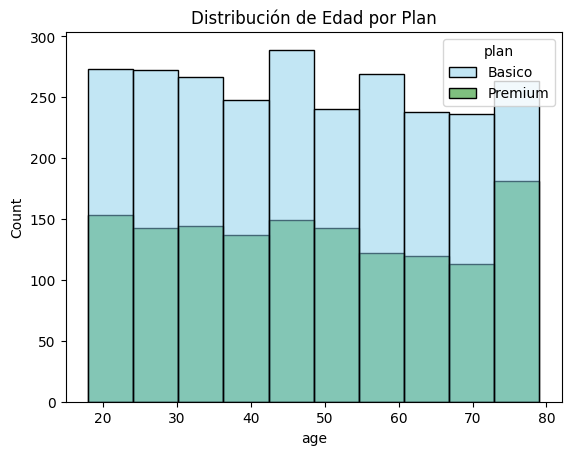

In [39]:
import seaborn as sns
sns.histplot(data=user_profile, x='age', hue='plan', 
             palette=['skyblue', 'green'], bins=10)
plt.title('Distribución de Edad por Plan')
plt.show()

💡Insights: 
- los rango de edad que más se visualizan son 15-25 años, 45-50 y 75-87 siendo esta ultima la edad más frecuente en los clientes
- el plan básico se presenta más en rangos de edad 45-50, 55-74
- el plan premiun se presenta más en rangos de edad 15-25, 45-50 y pricipalmente en 75-87

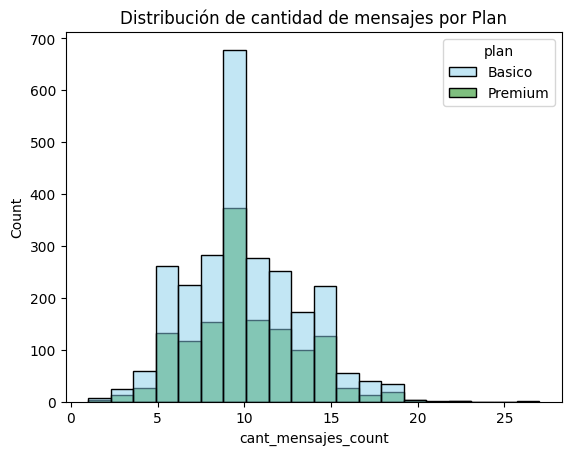

In [40]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes_count', hue='plan', 
             palette=['skyblue', 'green'], bins=20)
plt.title('Distribución de cantidad de mensajes por Plan')
plt.show()

💡Insights: 
- las personas que usan plan básico envían más mensajes, esto puede deberse al costo de enviar un mensaje

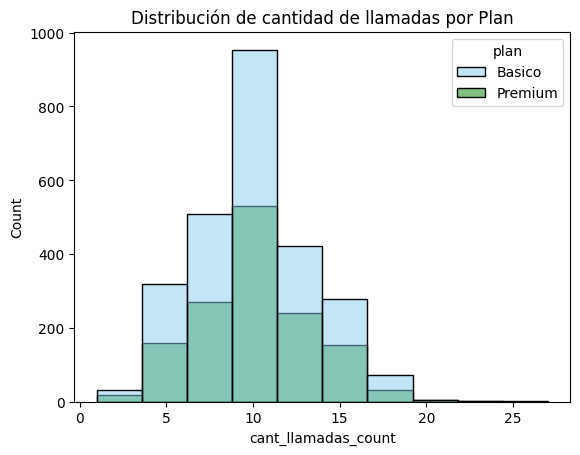

In [41]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas_count', hue='plan', 
             palette=['skyblue', 'green'], bins=10)
plt.title('Distribución de cantidad de llamadas por Plan')
plt.show()

💡Insights: 
- la distribución de llamadas en ambos planes es similar, parece que los usuarios de ambos planes hacen la misma cantidad de llamadas, esto puede deberse a los minutos añadidos en los planes

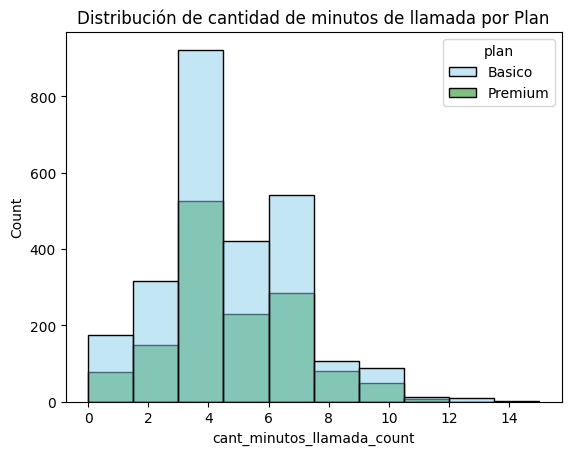

In [42]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada_count', hue='plan', 
             palette=['skyblue', 'green'], bins=10)
plt.title('Distribución de cantidad de minutos de llamada por Plan')
plt.show()

💡Insights: 
- la duración de las llamadas de los usuarios con plan premium es más alta a partir de los 4 min, esto puede deberse al costo por llamada

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

In [43]:
print("Columnas en el DataFrame:")
print(user_profile.columns.tolist())

Columnas en el DataFrame:
['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date', 'index', 'id_mean', 'id_sum', 'id_count', 'cant_minutos_llamada_mean', 'cant_minutos_llamada_sum', 'cant_minutos_llamada_count', 'length_mean', 'length_sum', 'length_count', 'duracion_vacia_mean', 'duracion_vacia_sum', 'duracion_vacia_count', 'longitud_vacia_mean', 'longitud_vacia_sum', 'longitud_vacia_count', 'cant_mensajes_mean', 'cant_mensajes_sum', 'cant_mensajes_count', 'cant_llamadas_mean', 'cant_llamadas_sum', 'cant_llamadas_count']


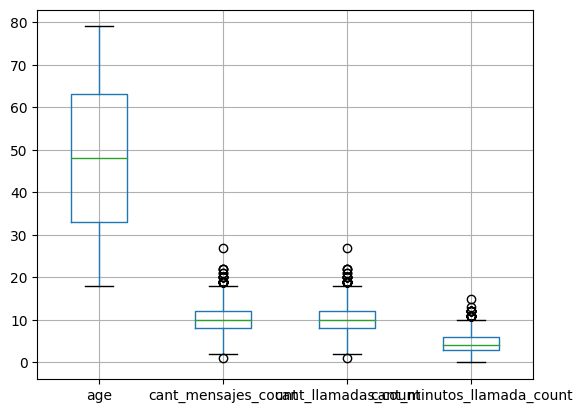

In [44]:
# Crear una copia del dataframe sin valores nulos en las columnas que vas a graficar
user_profile_clean = user_profile[['age', 'cant_mensajes_count', 'cant_llamadas_count', 'cant_minutos_llamada_count']].dropna()

# Ahora crear el boxplot con los datos limpios
user_profile_clean.boxplot()
plt.show()

Revisando: age


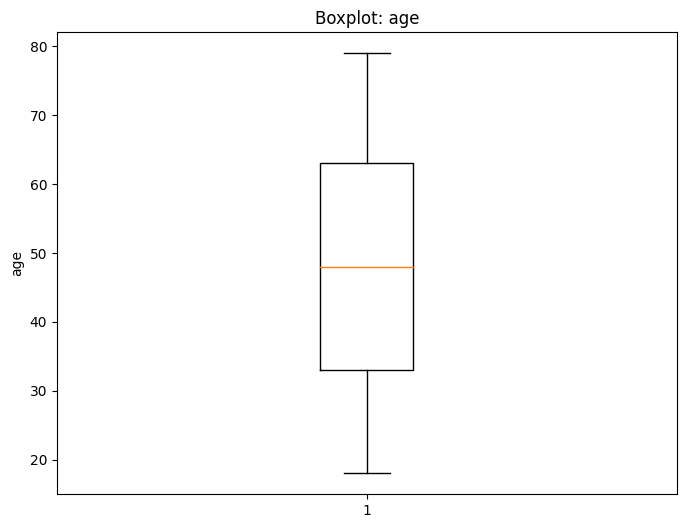

Revisando: cant_mensajes_count


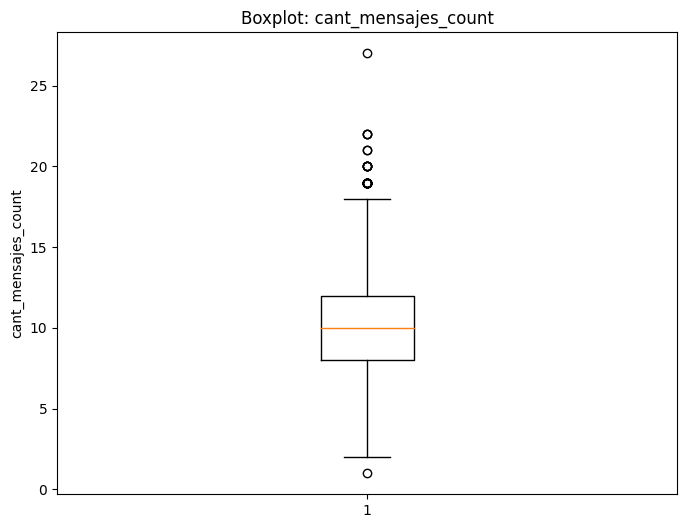

Revisando: cant_llamadas_count


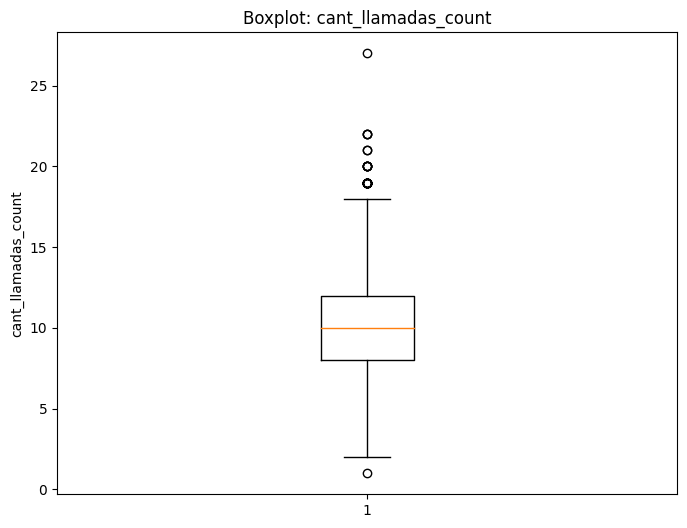

Revisando: cant_minutos_llamada_count


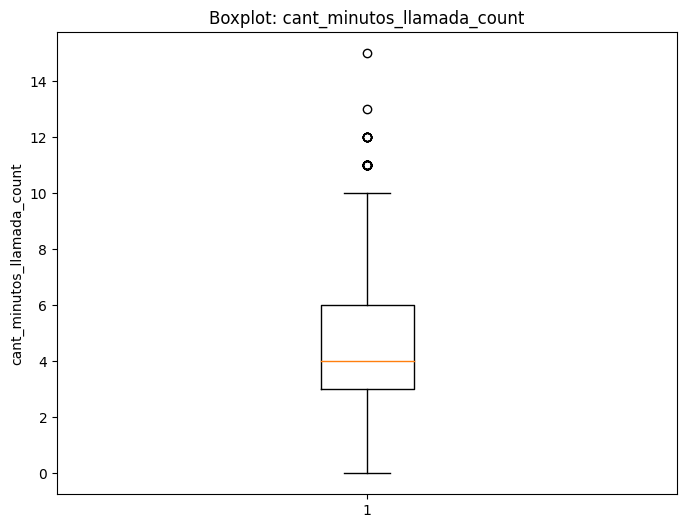

In [45]:

columnas_numericas = ['age', 'cant_mensajes_count', 'cant_llamadas_count', 'cant_minutos_llamada_count']

for col in columnas_numericas:
    print("Revisando:", col)
    plt.figure(figsize=(8, 6))  # Crear nueva figura para cada gráfico
    plt.boxplot(user_profile_clean[col])  # Aquí creas el boxplot
    plt.title(f'Boxplot: {col}')
    plt.ylabel(col)
    plt.show()  # Mostrar el gráfico

💡Insights: 
- Age: no presenta outliers porque corregimos los sentinels y las edades están dentro de rangos lógicos
- cant_mensajes: presenta outliers que pueden indicar que pocos usuarios están enviando demasiados mensajes y esto hace que se eleve el dato
- cant_llamadas: presenta outliers que pueden indicar que algunos usuarios están realizando demasiadas llamadas  y esto hace que se eleve el dato
- cant_minutos_llamada: presenta outliers que pueden indicar que algunos usuarios realizan pocas llamadas de mucha duración y esto hace que se eleve el dato

In [46]:
#Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el método IQR y decide qué hacer con ellos.
#Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

In [47]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes_count', 'cant_llamadas_count', 'cant_minutos_llamada_count']

for col in columnas_limites:
    print("revisando", col)
    
    Q1 = user_profile_clean[col].quantile(0.25)
    print('Primer cuartil: ', Q1)

    Q3 = user_profile_clean[col].quantile(0.75)
    print('Tercer cuartil: ', Q3)

    IQR = Q3 - Q1
    print('IQR: ', IQR)
    print("---")  

revisando cant_mensajes_count
Primer cuartil:  8.0
Tercer cuartil:  12.0
IQR:  4.0
---
revisando cant_llamadas_count
Primer cuartil:  8.0
Tercer cuartil:  12.0
IQR:  4.0
---
revisando cant_minutos_llamada_count
Primer cuartil:  3.0
Tercer cuartil:  6.0
IQR:  3.0
---


In [48]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile_clean[columnas_limites].describe()

,cant_mensajes_count,cant_llamadas_count,cant_minutos_llamada_count
count,3999.000000,3999.000000,3999.000000
mean,10.002501,10.002501,4.482121
std,3.191878,3.191878,2.145092
min,1.000000,1.000000,0.000000
25%,8.000000,8.000000,3.000000
50%,10.000000,10.000000,4.000000
75%,12.000000,12.000000,6.000000
max,27.000000,27.000000,15.000000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué?
- mantenerlos con el fin de identificar en qué rangos de edades y planes se realizan estas cantidades altas de envío de mensajes y analizarlo con el equipo de ventas
- cant_llamadas: mantener o no outliers, porqué?
- Mantenerlos para identificar qué tipo de plan es el que genera mayor cantidad de llamadas y tomar decisiones de ventas
- cant_minutos_llamada: mantener o no outliers, porqué? 
- Mantenerlos porque nos indica que hay usuarios que realizan muchas llamadas aunque la duración no sea larga

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [78]:

# Crear columna grupo_uso
user_profile_clean["grupo_uso"] = "alto_uso"
#uso medio
user_profile_clean.loc[(user_profile_clean["cant_mensajes_count"] < 10) & (user_profile_clean["cant_llamadas_count"]<10), "grupo_uso"] = "uso_medio"

user_profile_clean.loc[(user_profile_clean["cant_mensajes_count"] <5) & (user_profile_clean["cant_llamadas_count"]<5), "grupo_uso"] = "bajo_uso"


In [58]:
# verificar cambios
user_profile_clean.head()

,age,cant_mensajes_count,cant_llamadas_count,cant_minutos_llamada_count,grupo_uso
0,38.0,10.0,10.0,3.0,alto_uso
1,53.0,15.0,15.0,10.0,alto_uso
2,57.0,7.0,7.0,2.0,uso_medio
3,69.0,14.0,14.0,3.0,alto_uso
4,63.0,7.0,7.0,3.0,uso_medio


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [74]:

# Crear columna grupo_edad
user_profile_clean["grupo_edad"] = "adulto_mayor"
#uso medio
user_profile_clean.loc[(user_profile_clean["age"] < 30) & (user_profile_clean["age"]>=18), "grupo_edad"] = "joven"
#uso bajo
user_profile_clean.loc[(user_profile_clean["age"] < 60) & (user_profile_clean["age"]>=30), "grupo_edad"] = "adulto"

In [75]:
# verificar cambios
user_profile_clean.head(15)

,age,cant_mensajes_count,cant_llamadas_count,cant_minutos_llamada_count,grupo_uso,grupo_edad
0,38.0,10.0,10.0,3.0,alto_uso,adulto
1,53.0,15.0,15.0,10.0,alto_uso,adulto
2,57.0,7.0,7.0,2.0,uso_medio,adulto
3,69.0,14.0,14.0,3.0,alto_uso,adulto_mayor
4,63.0,7.0,7.0,3.0,uso_medio,adulto_mayor
5,61.0,12.0,12.0,7.0,alto_uso,adulto_mayor
6,39.0,8.0,8.0,5.0,uso_medio,adulto
7,70.0,8.0,8.0,5.0,uso_medio,adulto_mayor
8,76.0,10.0,10.0,5.0,alto_uso,adulto_mayor
9,47.0,8.0,8.0,3.0,uso_medio,adulto


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

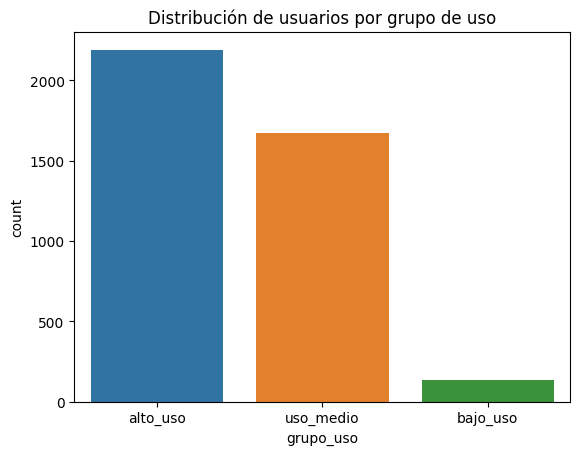

In [76]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile_clean, x="grupo_uso")
plt.title("Distribución de usuarios por grupo de uso")
plt.show()
plt.show()

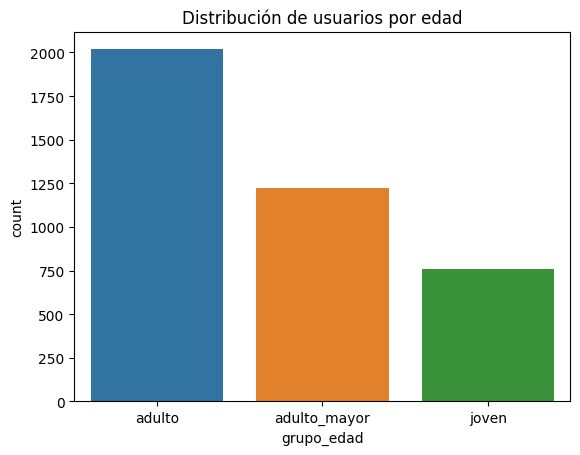

In [77]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile_clean, x="grupo_edad")
plt.title("Distribución de usuarios por edad")
plt.show()

In [88]:
print("Distribución de grupo_uso:")
print(user_profile_clean['grupo_uso'].value_counts())

Distribución de grupo_uso:
alto_uso     2191
uso_medio    1674
bajo_uso      134
Name: grupo_uso, dtype: int64


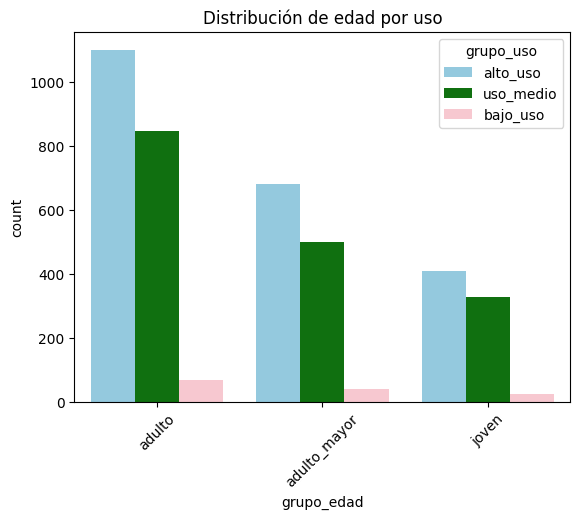

In [87]:
sns.countplot(data=user_profile_clean, x='grupo_edad', hue='grupo_uso', 
              palette=['skyblue', 'green', 'pink'])
plt.title('Distribución de edad por uso')
plt.xticks(rotation=45)
plt.show()



---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?
El segmento de adultos es el más valioso siendo 2191 usuarios que utilizan mucho el dispositivo para llamadas y mensajes
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?


### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Las edades registradas tenían datos imposibles que pudieron afectar el segmento por edad para identificar los usuarios más leales.
- Había 50 registros con fecha futura afectando al análisis de uso

🔍 **Segmentos por Edad**
Se identificaron segmentos de edad y de uso
Joven: 18 a 29 años, es el grupo más pequeño pero en general su nivel de uso es alto
Adulto: 30 a 59 años, siendo este el grupo más grande y quien por ende presenta mayor uso 
Adulto Mayor: 60+ años, es el grupo intermedio, tiene una cantidad media de usuarios y de igual forma tienen un nivel de uso alto


📊 **Segmentos por Nivel de Uso**
- El segmento de adultos es el más valioso siendo 2191 usuarios que utilizan mucho el dispositivo para llamadas y mensajes

➡️ Esto sugiere que 
-En el envío de mensajes hay pocos usuarios que han enviado mucha cantidad y eso eleva el promedio lo que implica que podría hacerse un ajuste en el costo de los mensajes para que todos los usuarios puedan usar más este servicio.
En la cantidad de llamadas hay pocos usuarios realizando muchas llamadas, no necesariamente de larga duración pero si muchas, lo que implica que si el negocio incluye llamadas ilimitadas en el plan podrían estar perdiendo dinero.
Los minutos por llamada muestran que existen muy pocas llamadas que duran mucho, esto no implica mucho para el negocio.

💡 **Recomendaciones**
-  Recomiendo crear planes para atraer clientes jóvenes y aumentar la cantidad de este segmento, analizar el comportamiento de uso los usuarios de uso medio para mejorar el plan respecto a llamadas y mensajes incluidos en su plan para que lo usen más, realizar ofertas por mes de incluir más llamadas al plan de los adultos mayores para evaluar su con esto incrementa el uso. 

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`